<a href="https://colab.research.google.com/github/IvanPP1018/SIMULACION-1/blob/main/Proyecto_PRUEBA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from pandas import DataFrame #Para hacer una tabla con los datos
from math import exp,sqrt,log
import ipywidgets as widgets
from IPython.display import display
from math import exp, sqrt
from scipy.stats import norm, binom #norm pra B&S y binm para Binomial
import pandas as pd

In [2]:
def nodos(s,u,d,n):
    numeros = [numero+1 for numero in range(1,n+1)]
    l=[0]
    for i in range(1,n+1):
        numeronuevo = l[i-1]+i
        l.append(numeronuevo)
    longitud = sum(numeros)
    lista_nodos = [s]
    i = 0
    while len(lista_nodos) <= longitud:
        if i == 0 or lista_nodos.index(s) in l:
            up = s*u
            lista_nodos.append(up)
            down = s*d
            lista_nodos.append(down)
        else:
            down = s*d
            lista_nodos.append(down)
        s = lista_nodos[i+1]
        i+=1
    return lista_nodos

def binomial_tree_american(S, K, T, r, sigma, N, opcion):
    dt = T / N
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (np.exp(r * dt) - d) / (u - d)

    # Inicializar la matriz de precios del subyacente
    prices = np.zeros((N + 1, N + 1))
    for i in range(N + 1):
        for j in range(i + 1):
            prices[j, i] = S * (u ** (i - j)) * (d ** j)

    # Inicializar la matriz de valores de la opción
    option_value = np.zeros((N + 1, N + 1))
    if opcion == 1 or 3:
        option_value[:, N] = np.maximum(0, prices[:, N] - K)
    elif opcion == 2 or 4:
        option_value[:, N] = np.maximum(0, K - prices[:, N])

    # Retroceder en el árbol binomial
    for i in range(N - 1, -1, -1):
        for j in range(i + 1):
            option_value[j, i] = np.exp(-r * dt) * (p * option_value[j, i + 1] + (1 - p) * option_value[j + 1, i + 1])
            if opcion == 1 or 3:
                option_value[j, i] = np.maximum(option_value[j, i], prices[j, i] - K)
            elif opcion == 2 or 4 :
                option_value[j, i] = np.maximum(option_value[j, i], K - prices[j, i])
    frame_prices = pd.DataFrame(prices)
    frame_options = pd.DataFrame(option_value)
    return float(option_value[0, 0]),frame_prices,frame_options

def binomial_tree_european(S, K, T, r, sigma, N, opcion):

    dt = T / N
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (np.exp(r * dt) - d) / (u - d)

    # Inicializar la matriz de precios, corresponde a una matriz diagonal superior
    prices = np.zeros((N + 1, N + 1))
    for i in range(N + 1):
        for j in range(i + 1):
            prices[j, i] = S * (u ** (i - j)) * (d ** j)

    # Inicializar la matriz de valores de opción
    option_values = np.zeros((N + 1, N + 1))
    if opcion == 1 or 3:
        option_values[:, N] = np.maximum(0, prices[:, N] - K)
    elif opcion == 2 or 4:
        option_values[:, N] = np.maximum(0, K - prices[:, N])

    # Retroceder a través del árbol
    for i in range(N - 1, -1, -1):
        for j in range(i + 1):
            option_values[j, i] = np.exp(-r * dt) * (p * option_values[j, i + 1] + (1 - p) * option_values[j + 1, i + 1])
    frame_prices = pd.DataFrame(prices)
    frame_options = pd.DataFrame(option_values)
    return float(option_values[0, 0]),frame_prices,frame_options

def tabla(s,opcion,T,n,r,k,u,d,sigma,Dt,Probabilidad,uno_probabilidad):
    if opcion == 1:
        option = 'Call Europeo'
    elif opcion ==2:
        option =  'Put Europeo'
    elif opcion ==3:
        option = 'Call Americano'
    elif opcion == 4:
        option = 'Put Americano'
    if sigma == 0:
        datos={'Dato         ':['Opción','S0','k','T','n','r','u','d','Dt','Probabilidad a la alza', 'Probabilidad a la baja'],
        '   Valor ingresado   ':[option, s,k,T,n,r,u,d,Dt,Probabilidad,uno_probabilidad]}
        tabla_datos = DataFrame(datos, columns = ['Dato         ','   Valor ingresado   '],
        index=['Tipo de opción','Precio incial del activo subyacente','Precio de ejercicio','Tiempo de vencimiento','Número de periodos',
        'Tasa libre de riesgo','Porcentaje de subida','Porcentaje de bajada', 'Delta t', 'Probabilidad a la alza', 'Probabilidad a la baja'])
    else:
        datos={'Dato         ':['Opción','S0','k','T','n','r','sigma','u','d','Dt','Probabilidad a la alza', 'Probabilidad a la baja'],
        '   Valor ingresado   ':[option, s,k,T,n,r,sigma,u,d,Dt,Probabilidad,uno_probabilidad]}
        tabla_datos = DataFrame(datos, columns = ['Dato         ','   Valor ingresado   '],
        index=['Tipo de opción','Precio incial del activo subyacente','Precio de ejercicio','Tiempo de vencimiento','Número de periodos',
        'Tasa libre de riesgo','Volatilidad','Porcentaje de subida','Porcentaje de bajada', 'Delta t', 'Probabilidad a la alza', 'Probabilidad a la baja'])
    print('\n')
    print("""
        ---------------------------------------
        || Resumen de los datos introducidos ||
        ---------------------------------------""")
    print(tabla_datos.round(4))


def mbinomial(s,n,r,k,u,d,sigma,Dt,Probabilidad,uno_probabilidad): #Funcion para determinar el precio de las opcion
    if sigma == 0:
        u = u
        d = d
    else:
        u  = round(exp(sigma*sqrt(Dt)),10)
        d  = round(1/u,10)
    valor_presente1 = exp(-n*r*Dt)
    valor_presenteT = exp(-r*Dt)

    #Calculando el valor de las opciones

    #Call y Put Europeo
    cuenta_call = 0
    cuenta_put = 0
    Nodos = nodos(s,u,d,n)
    Nodos1 = Nodos.copy()
    Nodos1 = Nodos1[::-1]
    lcu_y_cd = []
    for i in range(n+1):
        lcu_y_cd.append(Nodos1[i])
    lcu_y_cd = lcu_y_cd[::-1]
    for i in range(n+1):
        #Call Europeo
        cu = max(lcu_y_cd[i]-k,0)
        #Put Europeo
        pu = max(k-lcu_y_cd[i],0)
        cuenta_call  = cuenta_call + binom.pmf(n-i, n, Probabilidad)*cu
        cuenta_put = cuenta_put + binom.pmf(n-i,n,Probabilidad)*pu
    valor_del_call = valor_presente1 * cuenta_call
    valor_del_put = valor_presente1 * cuenta_put


    #Call y Put Americano
    lcu_y_cd = []
    lcu_y_cd_nuevo = []

    for i in range(len(Nodos)-(n+1)):
        lcu_y_cd.append(Nodos[i])
    lcu_y_cd = lcu_y_cd[::-1]
    lcu_y_cd_nuevo = lcu_y_cd.copy()
    lcu_y_cd_call = lcu_y_cd.copy()
    lcu_y_cd_put = lcu_y_cd.copy()

    for i in range(n): #Evaluamos los ultimos n valores desde el cero es decir n+1
        nodo_evaluar = lcu_y_cd_nuevo[i]
        up = nodo_evaluar*u
        maxup_call = max(up-k,0)
        maxup_put = max(k-up,0)

        down = nodo_evaluar*d
        maxdown_call = max(down-k,0)
        maxdown_put = max(k-down,0)

        call = valor_presenteT*(maxup_call*Probabilidad + maxdown_call*uno_probabilidad)
        put = valor_presenteT*(maxup_put*Probabilidad + maxdown_put*uno_probabilidad)
        rendimiento_ejercer_call = max(nodo_evaluar-k,0)
        rendimiento_ejercer_put = max(k-nodo_evaluar,0)

        if rendimiento_ejercer_call >= call:
            lcu_y_cd_call[i] = rendimiento_ejercer_call
        else:
            lcu_y_cd_call[i] = call         #Hasta aquí solo han cambiado los penultimos del call

        if rendimiento_ejercer_put >= put:
            lcu_y_cd_put[i] = rendimiento_ejercer_put
        else:
            lcu_y_cd_put[i] = put         #Hasta aquí solo han cambiado los penultimos del put

#Vamos a comparar las listas lcy_y_lcd vs lcu_ylcd_call y la del put para esto se necesitan en orden Ascendente
    lcu_y_cd = lcu_y_cd[::-1]
    lcu_y_cd_call = lcu_y_cd_call[::-1]
    lcu_y_cd_put = lcu_y_cd_put[::-1]
    i,h=0,0
    for j in lcu_y_cd_call:
        if j != lcu_y_cd[i]:
            indice_call = lcu_y_cd_call.index(j)
            break
        i+=1
    for j in lcu_y_cd_put:
        if j != lcu_y_cd[h]:
            indice_put = lcu_y_cd_put.index(j)
            break
        h+=1
    contador=0
    N=n
        #Ahora empezamos a cambiar los elementos a partir de indice-1
    for i in range(len(lcu_y_cd)-(n)): #A la longitud de la lista de nodos recortada le restamos los n valores desde el cero evaluados antes
        nodo_evaluar_call =  lcu_y_cd_call[indice_call-1]
        nodo_evaluar_put =  lcu_y_cd_put[indice_put-1]
        call = valor_presenteT*(lcu_y_cd_call[indice_call+(N-2)]*Probabilidad + lcu_y_cd_call[indice_call+(N-1)]*uno_probabilidad)
        put = valor_presenteT*(lcu_y_cd_put[indice_put+(N-2)]*Probabilidad + lcu_y_cd_put[indice_put+(N-1)]*uno_probabilidad)
        rendimiento_ejercer_call = max(nodo_evaluar_call-k,0)
        rendimiento_ejercer_put = max(k-nodo_evaluar_put,0)
        if rendimiento_ejercer_call >= call:
            lcu_y_cd_call[indice_call-1] = rendimiento_ejercer_call
        else:
            lcu_y_cd_call[indice_call-1] = call
        indice_call = indice_call -1

        if rendimiento_ejercer_put >= put:
            lcu_y_cd_put[indice_put-1] = rendimiento_ejercer_put
        else:
            lcu_y_cd_put[indice_put-1] = put
        indice_put = indice_put -1
        contador = contador + 1
        if contador == N-1:
            N = N-1
            contador = 0
    valor_del_call_americano = valor_presenteT*(Probabilidad*lcu_y_cd_call[1] + uno_probabilidad*lcu_y_cd_call[2])
    valor_del_put_americano = valor_presenteT*(Probabilidad*lcu_y_cd_put[1] + uno_probabilidad*lcu_y_cd_put[2])

    return valor_del_call, valor_del_put, valor_del_call_americano, valor_del_put_americano

def Black_Scholes(S, K, T, r, sigma, opcion):
  d1 = (np.log(S / K) + (r + (sigma ** 2 / 2) )* T) / (sigma * np.sqrt(T))
  d2 = d1 - (sigma * np.sqrt(T) )
  if opcion == 1 or 3:
     return (S * norm.cdf(d1) )- (K * np.exp(-r * T) * norm.cdf(d2))
  elif opcion == 2 or 4:
      return (K * np.exp(-r * T) * norm.cdf(-d2) ) - (S * norm.cdf(-d1))

def blancscholes(s,k,T,r,sigma,opcion):
    d1 = (log(s/k,exp(1)) + (r + (sigma**2/2)) * T )/(sigma * sqrt(T))
    d2 = d1 - (sigma*sqrt(T))
    if opcion == 1:
        c = s * norm.cdf(d1) - k*exp(-r*T)*norm.cdf(d2)
        option = 1
        print(f' \n El valor del {option} es {c}')
    else:
        c = k*exp(-r*T)*norm.cdf(-d2) - s * norm.cdf(-d1)
        option =  2
        print(f' \n El valor del {option} es {c}')

    datos={'Dato         ':['Opción','S0','k','T','r','sigma', 'd1', 'd2','op'],
    '   Valor ingresado   ':[option,s,k,T,r,sigma,d1,d2,c]}
    tabla_datos = DataFrame(datos, columns = ['Dato         ','   Valor ingresado   '],
    index=['Tipo de opción','Precio incial del activo subyacente','Precio de ejercicio','Tiempo de vencimiento',
    'Tasa libre de riesgo','Volatilidad','D1', 'D2','Valuación'])
    print("""
        --------------------------
        || Resumen de los datos ||
        --------------------------""")
    print(tabla_datos.round(4))

In [7]:
# Definir widgets
modelo_widget = widgets.Dropdown(
    options=['Binomial', 'Binomial con volatilidad', 'C'],
    description='Modelo:',
)

opcion_widget = widgets.Dropdown(
    options=[
        ('Call Europeo', 1),
        ('Put Europeo', 2),
        ('Call Americano', 3),
        ('Put Americano', 4)
    ],
    description='Opción:',
)


s_widget = widgets.FloatText(
    description="Precio (S_0):",
    value=20
)

k_widget = widgets.FloatText(
    description="Precio (K):",
    value=21
)


r_widget = widgets.FloatText(
    description="Tasa libre (r):",
    value=0.12
)

T_widget = widgets.FloatText(
    description="Vencimiento (meses):",
    value=6
)



n_widget = widgets.IntText(
    description="# Periodos (n):",
    disabled=False,
    value=2

)

u_widget = widgets.FloatText(
    description="Prob (u):",
    value=1.1

)

d_widget = widgets.FloatText(
    description="Prob (d):",
    layout=widgets.Layout(width='300px'),
    value=0.9
)

sigma_widget = widgets.FloatText(
    description="Volatilidad (sigma):",
    value=0
)

# Botón para calcular
calcular_button = widgets.Button(description="Calcular")
output = widgets.Output()

# Función al hacer clic en el botón
def on_button_click(b):
    with output:
      global s, k, T, r, n, u, d, sigma, Dt, Probabilidad, uno_probabilidad, opcion, modelo, Probabilidad, uno_probabilidad
      s=s_widget.value
      k=k_widget.value
      T=T_widget.value
      r=r_widget.value
      n=n_widget.value
      u=u_widget.value
      d=d_widget.value
      opcion=opcion_widget.value
      modelo=modelo_widget.value
      sigma=sigma_widget.value
      Dt = T / n/12
      Probabilidad = (exp(r * Dt) - d) / (u - d)
      uno_probabilidad = 1 - Probabilidad
      if modelo == 'Binomial' or modelo == 'Binomial con volatilidad':
          tabla(s, opcion, T, n, r, k, u, d, sigma, Dt, Probabilidad, uno_probabilidad)
          l = mbinomial(s, n, r, k, u, d, sigma, Dt, Probabilidad, uno_probabilidad)

          if opcion == 1:
              tipo = 'Call Europeo'
              v = 0
          elif opcion == 2:
              tipo = 'Put Europeo'
              v = 1
          elif opcion == 3:
              tipo = 'Call Americano'
              v = 2
          elif opcion == 4:
              tipo = 'Put Americano'
              v = 3

          print('\n')
          print(f'El precio del {tipo} solicitado es: {l[v]} \n')
          print("""
          ---------------------------------------------------------------------------------------------------------------
          || A continuación se muestra una tabla comparativa de la opción solicitada junto a los demás tipos de opción ||
          ---------------------------------------------------------------------------------------------------------------
          """)

          datos = {'Opción': ['Europeo', 'Europeo', 'Americano', 'Americano'],
                  'Precio': [l[0], l[1], l[2], l[3]]}

          tabla_datos = DataFrame(datos, columns=['Opción', 'Precio'],
                                    index=['Call', 'Put', 'Call', 'Put'])

          print('\n')
          print(tabla_datos.round(4))
          print('\n')
      else:
          blancscholes(s, k, T, r, sigma, opcion)

calcular_button.on_click(on_button_click)

# Mostrar los widgets
display(modelo_widget, opcion_widget, s_widget, k_widget, T_widget, r_widget, n_widget, u_widget, d_widget, sigma_widget, calcular_button, output)


Dropdown(description='Modelo:', options=('Binomial', 'Binomial con volatilidad', 'C'), value='Binomial')

Dropdown(description='Opción:', options=(('Call Europeo', 1), ('Put Europeo', 2), ('Call Americano', 3), ('Put…

FloatText(value=20.0, description='Precio (S_0):')

FloatText(value=21.0, description='Precio (K):')

FloatText(value=6.0, description='Vencimiento (meses):')

FloatText(value=0.12, description='Tasa libre (r):')

IntText(value=2, description='# Periodos (n):')

FloatText(value=1.1, description='Prob (u):')

FloatText(value=0.9, description='Prob (d):', layout=Layout(width='300px'))

FloatText(value=0.0, description='Volatilidad (sigma):')

Button(description='Calcular', style=ButtonStyle())

Output()

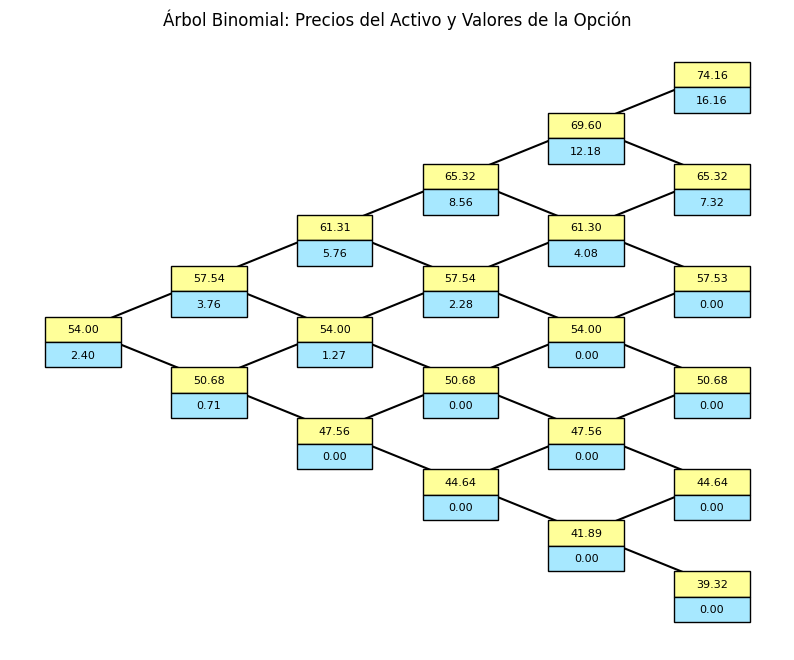

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Función para construir el árbol binomial de precios del activo
def construir_arbol_precios(s, u, d, n):
    precios = np.zeros((n + 1, n + 1))
    for i in range(n + 1):
        for j in range(i + 1):
            precios[j, i] = s * (u ** (i - j)) * (d ** j)
    return precios

# Función para construir el árbol binomial de valores de la opción
def construir_arbol_valores(precios, k, r, dt, p, n, opcion):
    valores = np.zeros((n + 1, n + 1))
    # Inicializar valores en el último nodo
    for j in range(n + 1):
        if opcion == 1:
            valores[j, n] = max(0, precios[j, n] - k)
        elif opcion == 2:
            valores[j, n] = max(0, k - precios[j, n])

    # Retropropagación
    for i in range(n - 1, -1, -1):
        for j in range(i + 1):
            valores[j, i] = np.exp(-r * dt) * (p * valores[j, i + 1] + (1 - p) * valores[j + 1, i + 1])
    return valores

def graficar_arbol(precios, valores, n):
    plt.figure(figsize=(10, 8))

    # Primero, dibujar las líneas de conexión
    for i in range(n):
        for j in range(i + 1):
            x, y = i, i - 2 * j
            # Dibujar las conexiones hacia los nodos hijos
            plt.plot([x, x + 1], [y, y - 1], 'k-', marker='o', markersize=4,zorder=0)
            plt.plot([x, x + 1], [y, y + 1], 'k-', marker='o', markersize=4,zorder=0)

    # Luego, dibujar los rectángulos (precio y valor de la opción)
    for i in range(n + 1):
        for j in range(i + 1):
            x, y = i, i - 2 * j  # Invertimos el eje vertical

            # Dibujar el primer rectángulo (precio)
            plt.gca().add_patch(patches.Rectangle((x - 0.3, y - 0.25), 0.6, 0.5, linewidth=1, edgecolor='black', facecolor='#FFFF99'))
            plt.text(x, y, f'{precios[j, i]:.2f}', color="black", fontsize=8, ha='center', va='center')

            # Dibujar el segundo rectángulo (valor de la opción)
            plt.gca().add_patch(patches.Rectangle((x - 0.3, y - 0.75), 0.6, 0.5, linewidth=1, edgecolor='black', facecolor='#A7E8FF'))
            plt.text(x, y - 0.5, f'{valores[j, i]:.2f}', color="black", fontsize=8, ha='center', va='center')

    plt.title('Árbol Binomial: Precios del Activo y Valores de la Opción')
    plt.xlabel('Pasos del árbol')
    plt.ylabel('Estado (invertido)')
    plt.grid(False)
    plt.axis('off')
    plt.show()

# Construcción y visualización del árbol
precios_arbol = construir_arbol_precios(s, u, d, n)
valores_arbol = construir_arbol_valores(precios_arbol, k, r, Dt, Probabilidad, n, opcion)

graficar_arbol(precios_arbol, valores_arbol, n)


In [25]:
N=75

In [28]:

def convergencia(S, K, T, r, sigma, N, opcion, I):

  Black = Black_Scholes(S, K, T, r, sigma, opcion)
  precios_american = []
  precios_europe = []
  flag1 = False
  flag2 = False
  n = 0
  k = 0

  for i in range(1, I):

    american, _ , _ = binomial_tree_american(S, K, T, r, sigma, i, opcion)
    europe, _ , _ = binomial_tree_european(S, K, T, r, sigma, i, opcion)

    precios_american.append(american)
    precios_europe.append(europe)

    difference_american = abs(american - Black)
    difference_europe = abs(europe - Black)

    if difference_american <= 0.01:
      if not flag1:
        dif1 = difference_american
        n = i
        flag1 = True

    if difference_europe <= 0.01:
      if not flag2:
        dif2 = difference_europe
        k = i
        flag2 = True

  #gradicar
  plt.plot(precios_american, label='Americano')
  plt.plot(precios_europe, label='Europeo')
  plt.plot(np.ones(I) * Black, label='Black-Scholes')
  plt.title('Convergencia de la opción call')

  plt.xlabel('N')
  plt.ylabel('Precio')
  plt.legend()

  plt.show()

  print(f'Precio Black-Scholes: {Black}')

  print(f"Diferencia americano: {dif1}")
  print(f"N: {n}")
  print(f'Precio: {precios_american[n-1]}')

  print(f"Diferencia europe: {dif2}")
  print(f"N: {k}")
  print(f'Precio: {precios_europe[k-1]}')

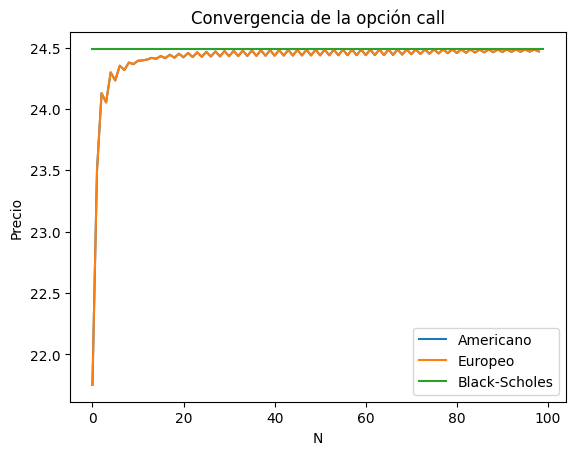

Precio Black-Scholes: 24.48852019661642
Diferencia americano: 0.009781755631369293
N: 40
Precio: 24.47873844098505
Diferencia europe: 0.009781755631369293
N: 40
Precio: 24.47873844098505


In [27]:
I=100

convergencia(s, k, T, r, sigma, n, opcion, I)
